# 通路分析

在该教程, 我们尝试使用LLM 来在实际的数据背景下解释 GO 术语或者通路。

In [1]:
import scanpy as sc

In [2]:
adata = sc.read_h5ad("pbmc.h5ad")

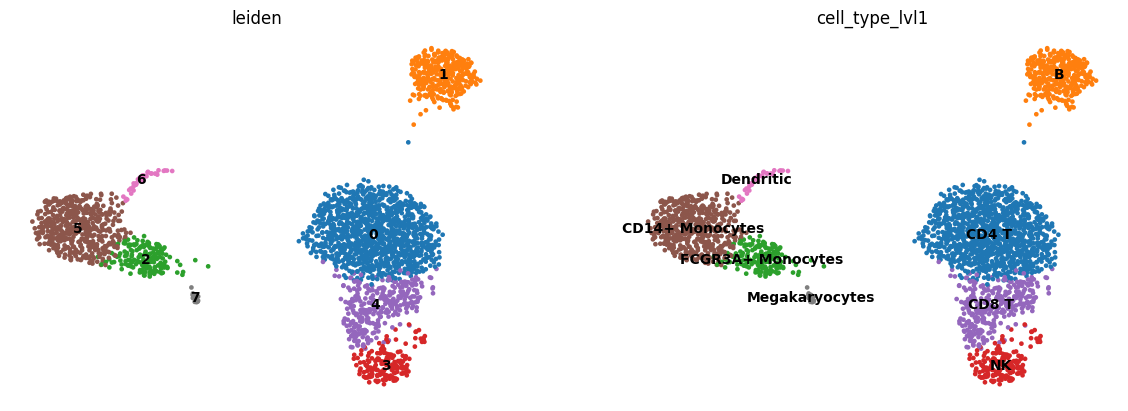

In [3]:
sc.pl.umap(adata, color=["leiden", "cell_type_lvl1"], legend_loc="on data", frameon=False)


In [4]:
celltype_dic = adata.obs.set_index('leiden')['cell_type_lvl1'].to_dict()
celltype_dic

{'0': 'CD4 T',
 '1': 'B',
 '2': 'FCGR3A+ Monocytes',
 '3': 'NK',
 '4': 'CD8 T',
 '5': 'CD14+ Monocytes',
 '6': 'Dendritic',
 '7': 'Megakaryocytes'}

In [5]:
deg_df = sc.get.rank_genes_groups_df(adata, None,key="logreg_deg")

In [6]:
import gseapy as gp

term_dic = {}
for gi,sdf in deg_df.groupby("group"):
    enr_bp = gp.enrichr(sdf["names"][:800].tolist(), gene_sets=['GO_Biological_Process_2023'], outdir=None)
    term_ls = enr_bp.res2d.loc[enr_bp.res2d["Adjusted P-value"]<0.05, "Term"].tolist()[:20]
    term_dic[gi] = term_ls

/tmp/ipykernel_3064281/1166100747.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for gi,sdf in deg_df.groupby("group"):


In [8]:
import gptbioinsightor as gbi 
### set API KEY
import os
os.environ['API_KEY'] = "sk-d8630ac28c4347109d941fb1f64884b6"

background = "Cells are PBMCs from a Healthy Donor."

## lang="zh" 返回中文，默认lang="en"英文
gbi.depict_pathway(term_dic, out="Pathway.zh.md", 
                   celltype_dic=celltype_dic, background=background,
                   provider="aliyun", model="qwen2-72b-instruct", lang="zh")